Greyscale ℓ1-TV Denoising
=========================

This example demonstrates the use of class [tvl1.TVL1Deconv](http://sporco.rtfd.org/en/latest/sporco.admm.tvl1.html#sporco.admm.tvl1.TVL1Deconv) for removing salt & pepper noise from a greyscale image using Total Variation regularization with an ℓ1 data fidelity term (ℓ1-TV denoising). (This class is primarily intended for deconvolution problems, but can be applied to denoising problems by choosing an impulse filter as the blurring kernel.)

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import numpy as np

from sporco.admm import tvl1
from sporco import util
from sporco import metric
from sporco import plot
plot.config_notebook_plotting()

Load reference image.

In [2]:
img = util.ExampleImages().image('monarch.png', scaled=True,
                                 idxexp=np.s_[:,160:672], gray=True)

Construct test image corrupted by 20% salt & pepper noise.

In [3]:
np.random.seed(12345)
imgn = util.spnoise(img, 0.2)

Set regularization parameter and options for ℓ1-TV deconvolution solver. The regularization parameter used here has been manually selected for good performance.

In [4]:
lmbda = 8e-1
opt = tvl1.TVL1Deconv.Options({'Verbose': True, 'MaxMainIter': 200,
                               'RelStopTol': 5e-3, 'gEvalY': False,
                               'AutoRho': {'Enabled': True}})

Create solver object and solve, returning the the denoised image ``imgr``.

In [5]:
b = tvl1.TVL1Deconv(np.ones((1,1)), imgn, lmbda, opt)
imgr = b.solve()

Itn   Fnc       DFid      RegTV     r         s         ρ         
----------------------------------------------------------------


   0  4.71e+04  2.98e+04  2.16e+04  3.16e-01  2.74e-01  1.70e+00
   1  4.05e+04  2.95e+04  1.37e+04  2.45e-01  4.21e-01  1.70e+00
   2  6.55e+04  4.40e+04  2.68e+04  2.66e-01  4.04e-01  1.30e+00


   3  4.61e+04  3.07e+04  1.92e+04  2.33e-01  1.97e-01  1.05e+00
   4  4.50e+04  3.02e+04  1.85e+04  2.02e-01  2.43e-01  1.05e+00
   5  5.12e+04  3.56e+04  1.96e+04  1.89e-01  1.85e-01  9.59e-01


   6  4.30e+04  3.13e+04  1.47e+04  1.55e-01  1.43e-01  9.59e-01
   7  4.14e+04  2.97e+04  1.47e+04  1.34e-01  1.30e-01  9.59e-01
   8  4.20e+04  3.09e+04  1.39e+04  1.16e-01  1.12e-01  9.59e-01


   9  3.94e+04  2.97e+04  1.21e+04  9.86e-02  8.72e-02  9.59e-01
  10  3.83e+04  2.88e+04  1.19e+04  8.61e-02  7.88e-02  9.59e-01
  11  3.81e+04  2.93e+04  1.09e+04  7.45e-02  6.37e-02  9.59e-01


  12  3.68e+04  2.86e+04  1.03e+04  6.46e-02  5.79e-02  9.59e-01
  13  3.63e+04  2.83e+04  1.01e+04  5.70e-02  4.83e-02  9.59e-01
  14  3.59e+04  2.84e+04  9.42e+03  4.96e-02  3.99e-02  9.59e-01


  15  3.53e+04  2.81e+04  8.93e+03  4.18e-02  4.03e-02  1.07e+00
  16  3.50e+04  2.79e+04  8.90e+03  3.77e-02  3.25e-02  1.07e+00
  17  3.46e+04  2.79e+04  8.41e+03  3.29e-02  2.74e-02  1.07e+00


  18  3.44e+04  2.78e+04  8.31e+03  2.89e-02  2.77e-02  1.17e+00
  19  3.42e+04  2.76e+04  8.20e+03  2.61e-02  2.24e-02  1.17e+00
  20  3.40e+04  2.76e+04  7.99e+03  2.35e-02  1.96e-02  1.17e+00


  21  3.39e+04  2.76e+04  7.94e+03  2.16e-02  1.78e-02  1.17e+00
  22  3.37e+04  2.75e+04  7.81e+03  1.93e-02  1.70e-02  1.29e+00
  23  3.37e+04  2.75e+04  7.75e+03  1.80e-02  1.44e-02  1.29e+00


  24  3.36e+04  2.75e+04  7.65e+03  1.63e-02  1.45e-02  1.44e+00
  25  3.35e+04  2.74e+04  7.64e+03  1.54e-02  1.25e-02  1.44e+00
  26  3.34e+04  2.74e+04  7.57e+03  1.42e-02  1.26e-02  1.60e+00


  27  3.34e+04  2.74e+04  7.57e+03  1.35e-02  1.11e-02  1.60e+00
  28  3.34e+04  2.73e+04  7.53e+03  1.27e-02  1.13e-02  1.77e+00
  29  3.33e+04  2.73e+04  7.52e+03  1.21e-02  9.93e-03  1.77e+00


  30  3.33e+04  2.73e+04  7.50e+03  1.15e-02  1.03e-02  1.96e+00
  31  3.33e+04  2.73e+04  7.49e+03  1.10e-02  9.39e-03  1.96e+00


  32  3.33e+04  2.73e+04  7.48e+03  1.06e-02  9.05e-03  1.96e+00
  33  3.33e+04  2.73e+04  7.48e+03  1.02e-02  8.32e-03  1.96e+00


  34  3.32e+04  2.73e+04  7.48e+03  9.78e-03  8.68e-03  2.17e+00
  35  3.32e+04  2.72e+04  7.47e+03  9.44e-03  8.15e-03  2.17e+00
  36  3.32e+04  2.72e+04  7.47e+03  9.12e-03  7.76e-03  2.17e+00


  37  3.32e+04  2.72e+04  7.47e+03  8.81e-03  7.40e-03  2.17e+00
  38  3.32e+04  2.72e+04  7.47e+03  8.53e-03  7.06e-03  2.17e+00
  39  3.32e+04  2.72e+04  7.46e+03  8.19e-03  7.29e-03  2.38e+00


  40  3.32e+04  2.72e+04  7.46e+03  7.92e-03  6.98e-03  2.38e+00
  41  3.32e+04  2.72e+04  7.46e+03  7.66e-03  6.70e-03  2.38e+00
  42  3.32e+04  2.72e+04  7.46e+03  7.41e-03  6.45e-03  2.38e+00


  43  3.32e+04  2.72e+04  7.46e+03  7.17e-03  6.22e-03  2.38e+00
  44  3.32e+04  2.72e+04  7.46e+03  6.93e-03  6.02e-03  2.38e+00
  45  3.32e+04  2.72e+04  7.46e+03  6.71e-03  5.80e-03  2.38e+00


  46  3.31e+04  2.72e+04  7.46e+03  6.49e-03  5.55e-03  2.38e+00
  47  3.31e+04  2.72e+04  7.45e+03  6.28e-03  5.34e-03  2.38e+00
  48  3.31e+04  2.72e+04  7.45e+03  6.08e-03  5.14e-03  2.38e+00


  49  3.31e+04  2.72e+04  7.45e+03  5.89e-03  4.95e-03  2.38e+00
  50  3.31e+04  2.72e+04  7.45e+03  5.71e-03  4.76e-03  2.38e+00


  51  3.31e+04  2.72e+04  7.45e+03  5.53e-03  4.60e-03  2.38e+00
  52  3.31e+04  2.72e+04  7.44e+03  5.31e-03  4.74e-03  2.61e+00
  53  3.31e+04  2.72e+04  7.44e+03  5.14e-03  4.59e-03  2.61e+00


  54  3.31e+04  2.72e+04  7.44e+03  4.98e-03  4.41e-03  2.61e+00
----------------------------------------------------------------


Display solve time and denoising performance.

In [6]:
print("TVL1Deconv solve time: %5.2f s" % b.timer.elapsed('solve'))
print("Noisy image PSNR:    %5.2f dB" % metric.psnr(img, imgn))
print("Denoised image PSNR: %5.2f dB" % metric.psnr(img, imgr))

TVL1Deconv solve time:  9.43 s
Noisy image PSNR:    11.58 dB
Denoised image PSNR: 28.65 dB


Display reference, corrupted, and denoised images.

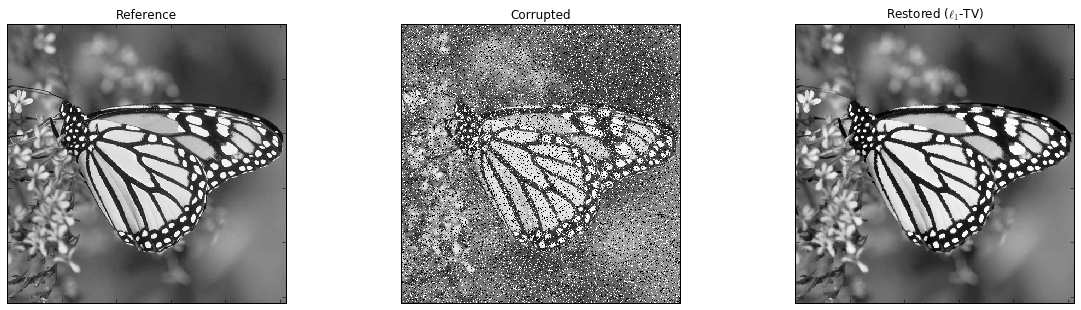

In [7]:
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.imview(img, title='Reference', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(imgn, title='Corrupted', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(imgr, title=r'Restored ($\ell_1$-TV)', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

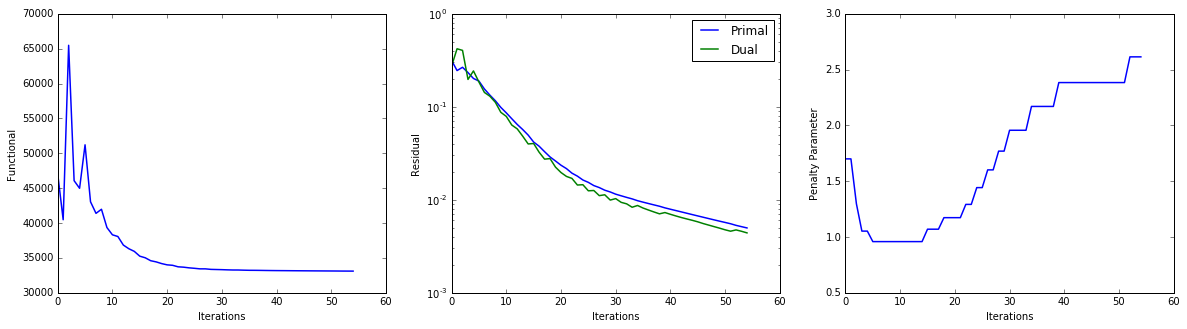

In [8]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T, ptyp='semilogy',
          xlbl='Iterations', ylbl='Residual', lgnd=['Primal', 'Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()